In [1]:

import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
y = iris.target
print (X.max())
print (y.shape)

7.9
(150,)


In [4]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]
print (X_plot.shape)


(34112, 2)


In [5]:
# Create the linear SVC model object
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C, decision_function_shape='ovr').fit(X, y)
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

In [7]:
# Create the rbf non-linear SVC model object
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=C, decision_function_shape='ovr').fit(X, y)

Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.subplot(132)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')

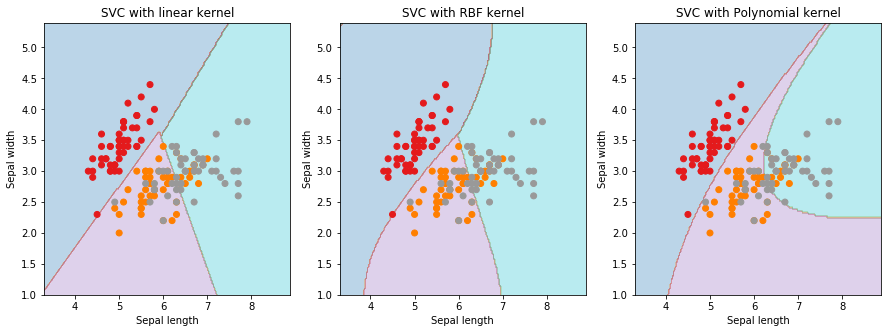

In [8]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='poly', degree=3, C=C, decision_function_shape='ovr').fit(X, y)

Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.subplot(133)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Polynomial kernel')

plt.show()